# Allen Cunneen approximation (GI/G/c model)

For models with general inter-arrival and service times there are no exact analytic solutions. The Allen Cunneen formula will give some approximation results.

## Importing modules

In [1]:
# Erlang module
from queuesim.analytic import ac_approx_table

# Plotting modules
import matplotlib.pyplot as plt
import matplotlib.ticker as formater
import seaborn as sns

# Defining general plot style
sns.set()
percent_formater = formater.PercentFormatter(xmax=1, decimals=0)

## Mean waiting time as a function of the coefficient of variation of the service times

In [2]:
# Arrival rate
l = 1 / 100

# Service rate
mu = 1 / 80

# Number of operators
c = 1

# Coefficient of variation of the inter-arrival times
cv_i = 1  # exponential distribution has always cv_i = 1

# Coefficient of variation of the service times range
cv_s_range = [i / 10 for i in range(5, 16)]

# Allen Cunneen results for different values of cv_s
results = ac_approx_table([(l, mu, c, cv_i**2, cv_s**2) for cv_s in cv_s_range])

# Display results table
results

,lambda,mu,a,c,rho,CV[I],CV[S],SCV[I],SCV[S],E[N_Q],E[N],E[W],E[V]
0,0.01,0.0125,0.8,1,0.8,1.0,0.5,1,0.25,2.000,2.800,200.0,280.0
1,0.01,0.0125,0.8,1,0.8,1.0,0.6,1,0.36,2.176,2.976,217.6,297.6
2,0.01,0.0125,0.8,1,0.8,1.0,0.7,1,0.49,2.384,3.184,238.4,318.4
3,0.01,0.0125,0.8,1,0.8,1.0,0.8,1,0.64,2.624,3.424,262.4,342.4
4,0.01,0.0125,0.8,1,0.8,1.0,0.9,1,0.81,2.896,3.696,289.6,369.6
5,0.01,0.0125,0.8,1,0.8,1.0,1.0,1,1.00,3.200,4.000,320.0,400.0
6,0.01,0.0125,0.8,1,0.8,1.0,1.1,1,1.21,3.536,4.336,353.6,433.6
7,0.01,0.0125,0.8,1,0.8,1.0,1.2,1,1.44,3.904,4.704,390.4,470.4
8,0.01,0.0125,0.8,1,0.8,1.0,1.3,1,1.69,4.304,5.104,430.4,510.4
9,0.01,0.0125,0.8,1,0.8,1.0,1.4,1,1.96,4.736,5.536,473.6,553.6


## Plot results

In [3]:
# Optional: Interactive diagram mode
# Run "pip install ipympl" first
# %matplotlib ipympl

Text(0.5, 1.0, 'Allen Cunneen model at different coefficients of variation of the service times')

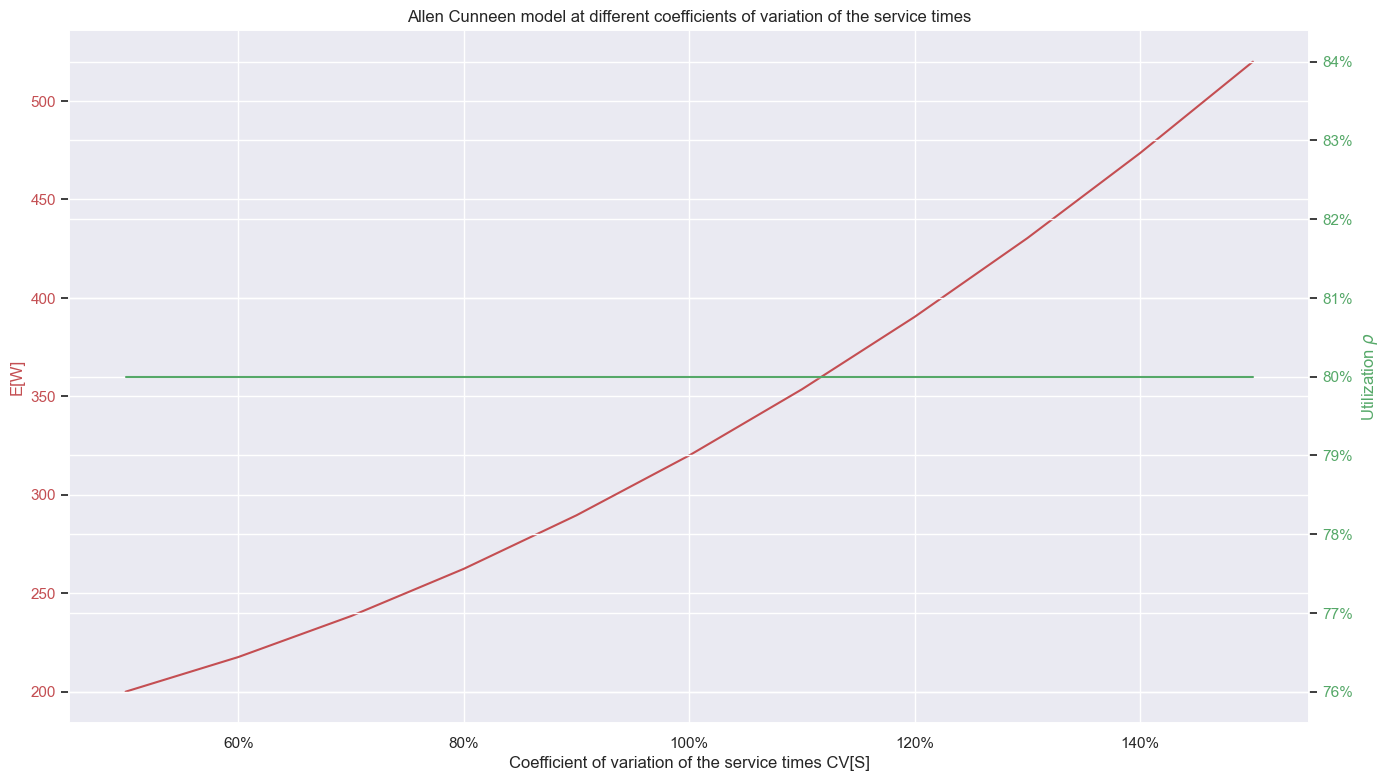

In [4]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(results["CV[S]"], results["E[W]"], 'r')
ax.tick_params(axis='y', labelcolor='r')
ax.set_xlabel("Coefficient of variation of the service times CV[S]")
ax.set_ylabel("E[W]", color='r')
ax.xaxis.set_major_formatter(percent_formater)

ax = ax.twinx()
ax.plot(results["CV[S]"], results["rho"], 'g')
ax.tick_params(axis='y', labelcolor='g')
ax.set_ylabel("Utilization $\\rho$", color='g')
ax.yaxis.set_major_formatter(percent_formater)

ax.set_title("Allen Cunneen model at different coefficients of variation of the service times")

The mean waiting time is increasing at increasing variations of the service times (at fixed utilization).